In [3]:
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import pandas as pd
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

In [4]:
data = pd.read_csv('dataset/cleaned_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14384 entries, 0 to 14383
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    14383 non-null  object
 1   type    14384 non-null  object
dtypes: object(2)
memory usage: 224.9+ KB


C:\Users\axioo\AppData\Local\Temp\ipykernel_18056\632069646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x = data['type'], palette=cols)


Text(0, 0.5, 'Number of Text')

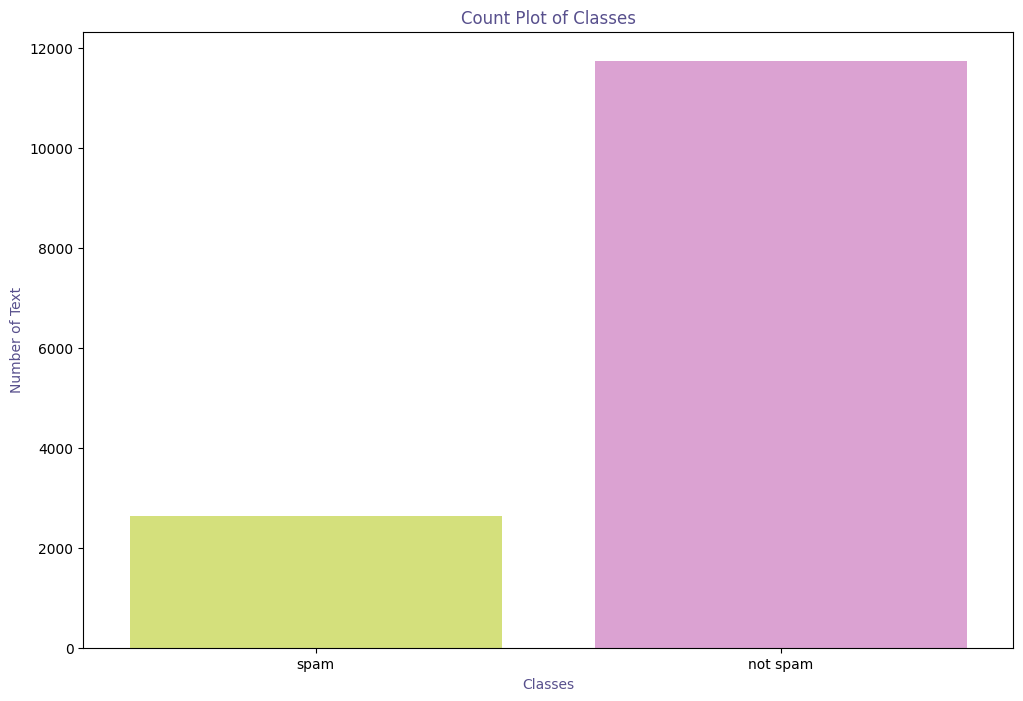

In [5]:
cols = ['#E1F16B', '#E598D8']
plt.figure(figsize=(12, 8))
fg = sns.countplot(x = data['type'], palette=cols)
fg.set_title('Count Plot of Classes', color = '#58508d')
fg.set_xlabel('Classes', color = '#58508d')
fg.set_ylabel('Number of Text', color = '#58508d')

In [6]:
data['No_of_Characters'] = data['text'].apply(len)
data['No_of_Words'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis = 1).apply(len)
data['No_of_Sentence'] = data.apply(lambda row: nltk.sent_tokenize(row['text']), axis = 1).apply(len)

data.describe().T

TypeError: object of type 'float' has no len()